In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re


In [2]:
input_folder = "../merge_data/"
output_folder = "../clean_data/"

# User

In [3]:
users = pd.read_csv(input_folder + 'users.csv')
users

,User-ID,Location,Age,Rating Count,Average Rating
0,243,"arden hills, minnesota, usa",NaN,7.0,8.142857
1,254,"minneapolis, minnesota, usa",24.0,12.0,8.583333
2,638,"san diego, california, usa",20.0,19.0,9.473684
3,805,"sonoma, california, usa",34.0,6.0,9.000000
4,882,"berkeley, california, usa",23.0,6.0,10.000000
...,...,...,...,...,...
2547,278202,"coral springs, florida, usa",NaN,5.0,4.600000
2548,278418,"omaha, nebraska, usa",NaN,13.0,6.461538
2549,278582,"slidell, louisiana, usa",NaN,5.0,8.400000
2550,278633,"sandy, utah, usa",NaN,12.0,8.000000


## Age

In [4]:

users.loc[users['Age'] < 6, 'Age'] = np.nan
users.loc[users['Age'] > 100, 'Age'] = np.nan

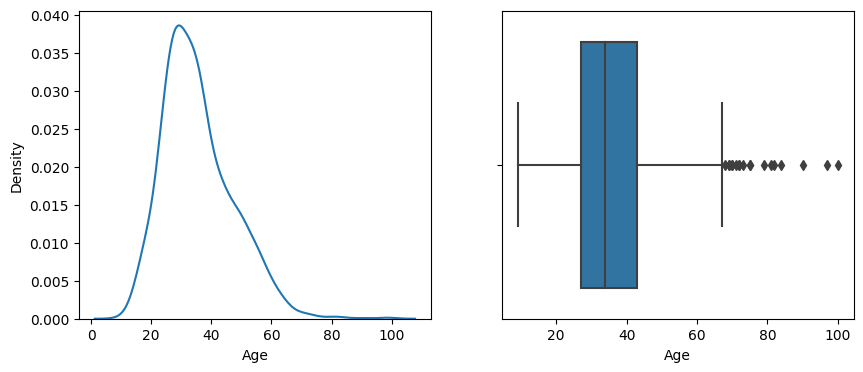

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(users['Age'], ax=ax1)
_ = sns.boxplot(x=users['Age'], ax=ax2)


## Countries

In [6]:
countries = users['Location'].str.extract(r'(\w+)$')
countries.columns = ['Country']
countries['Country'].value_counts()
users['Country'] = countries['Country']
users

,User-ID,Location,Age,Rating Count,Average Rating,Country
0,243,"arden hills, minnesota, usa",NaN,7.0,8.142857,usa
1,254,"minneapolis, minnesota, usa",24.0,12.0,8.583333,usa
2,638,"san diego, california, usa",20.0,19.0,9.473684,usa
3,805,"sonoma, california, usa",34.0,6.0,9.000000,usa
4,882,"berkeley, california, usa",23.0,6.0,10.000000,usa
...,...,...,...,...,...,...
2547,278202,"coral springs, florida, usa",NaN,5.0,4.600000,usa
2548,278418,"omaha, nebraska, usa",NaN,13.0,6.461538,usa
2549,278582,"slidell, louisiana, usa",NaN,5.0,8.400000,usa
2550,278633,"sandy, utah, usa",NaN,12.0,8.000000,usa


In [7]:

countries_to_select = ['usa', 'canada', 'kingdom', 'australia']
selected_users = users[users['Country'].isin(countries_to_select)]
# not_selected_users = users[~users['Country'].isin(countries_to_select)]

## Average Rating

In [8]:
users[users['Average Rating'] > 10]

,User-ID,Location,Age,Rating Count,Average Rating,Country


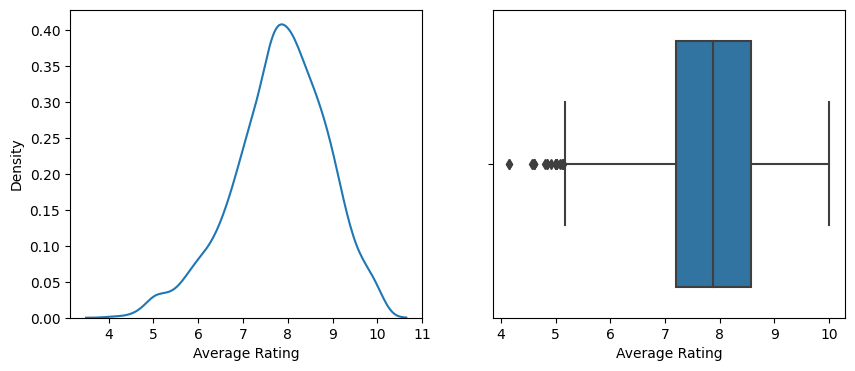

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(users['Average Rating'], ax=ax1)
_ = sns.boxplot(x=users['Average Rating'], ax=ax2)

In [10]:
users.to_csv(output_folder + 'users.csv', index=False)

# Ratings

In [11]:
ratings = pd.read_csv(input_folder + 'ratings.csv')
ratings

,User-ID,Book-Rating,Book Title
0,277157,5,City of Bones
1,277157,6,Balance of Power
2,277157,5,Saving Faith
3,277157,7,Perchance to Dream
4,277157,7,Potshot
...,...,...,...
29831,276680,9,A Simple Plan
29832,276680,10,Mystic River
29833,276680,6,Salem Falls
29834,276680,10,Affinity


Average: 7.868648612414533


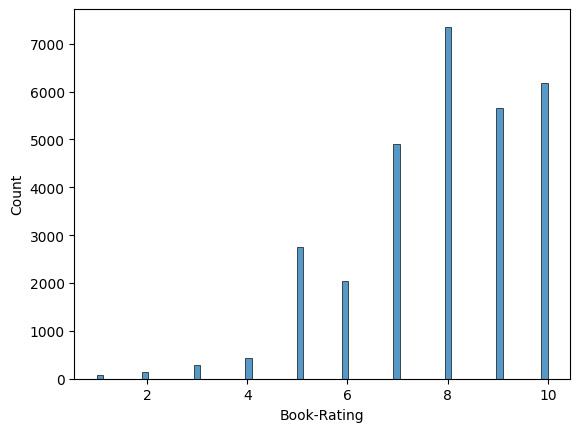

In [12]:
_ = sns.histplot(ratings['Book-Rating'])
print(f"Average: {ratings['Book-Rating'].mean()}")

In [13]:
ratings.to_csv(output_folder + 'ratings.csv', index=False)

# Books

In [14]:
books = pd.read_csv(input_folder + 'books.csv')
books[:3]

,Book Title,Author,Publication Year,Genres,Summary,Rating Count,Average Rating,Number of Pages,Best Seller,Film,Saga,Followed by,Preceded by
0,Davita's Harp,Chaim Potok,1990.0,NaN,"In New York City of the 1930s, Ilana Davita C...",12.0,7.714286,371.0,No,No,No,NaN,NaN
1,Assassin's Quest,Robin Hobb,1997.0,['Fantasy'],FitzChivalry Farseer has been raised from deat...,0.0,NaN,742848.0,False,False,The Farseer Trilogy,NaN,Royal Assassin
2,The Ill-Made Knight,Meg Cabot,1940.0,['Fantasy'],Much of The Ill-Made Knight takes place mainly...,0.0,NaN,291.0,False,False,The Once and Future King,The Candle in the Wind,The Queen of Air and Darkness


In [15]:
books[books["Publication Year"] < 1400]

,Book Title,Author,Publication Year,Genres,Summary,Rating Count,Average Rating,Number of Pages,Best Seller,Film,Saga,Followed by,Preceded by
7825,The Tale of Genji,Murasaki Shikibu,1021.0,['Fiction'],The work recounts the life of a son of the Ja...,1.0,NaN,NaN,No,Yes,No,NaN,NaN


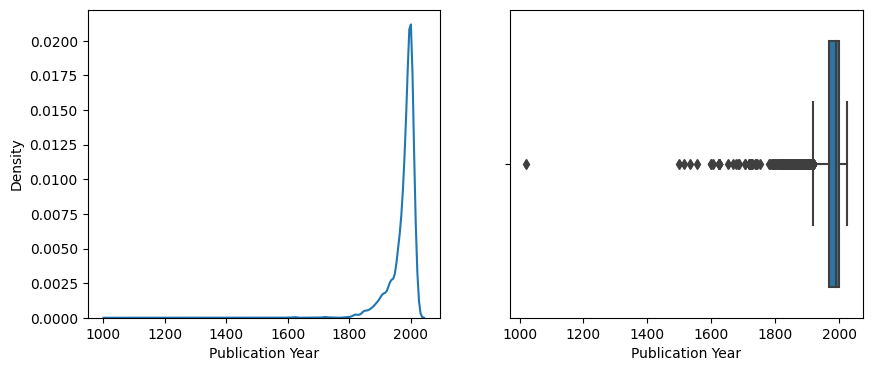

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(books['Publication Year'], ax=ax1)
_ = sns.boxplot(x=books['Publication Year'], ax=ax2)

# Number of Pages

In [17]:
books[books["Number of Pages"] > 2000] = np.nan

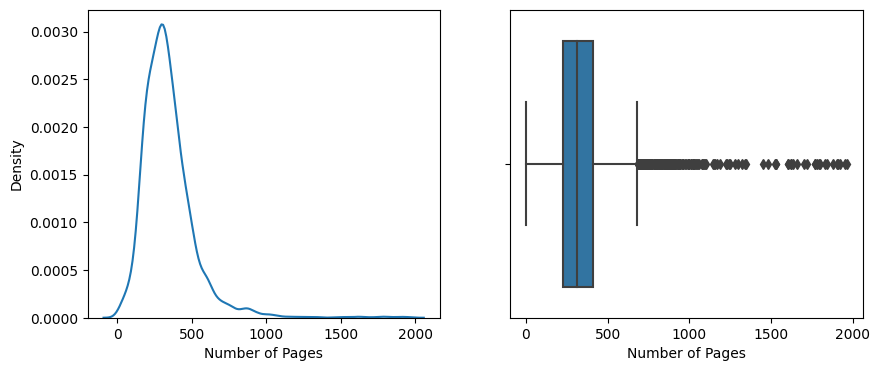

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

_ = sns.kdeplot(books['Number of Pages'], ax=ax1)
_ = sns.boxplot(x=books['Number of Pages'], ax=ax2)

## Film

In [19]:
books['Film'][books['Film'] == 'False'] = 'No'
books['Film'][books['Film'] == 'True'] = 'Yes'
books['Film'].value_counts()

C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\3361782967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Film'][books['Film'] == 'False'] = 'No'
C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\3361782967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Film'][books['Film'] == 'True'] = 'Yes'


Film
No     5499
Yes    4043
Name: count, dtype: int64

## Best-Seller

In [20]:
books['Best Seller'][books['Best Seller'] == 'False'] = 'No'
books['Best Seller'][books['Best Seller'] == 'True'] = 'Yes'
books['Best Seller'].value_counts()

C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\8634830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Best Seller'][books['Best Seller'] == 'False'] = 'No'
C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\8634830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Best Seller'][books['Best Seller'] == 'True'] = 'Yes'


Best Seller
No     8862
Yes     680
Name: count, dtype: int64

## Genres

In [21]:
books_without_nas = books.dropna(subset=['Genres', 'Publication Year', 'Summary', 'Best Seller', 'Film', 'Saga'])

lambda x : re.sub(r'[\'\[\]]', '', x).split(', ')

genres = dict()


# split_pattern  = re.compile(r'[&(, )/]')
split_pattern  = re.compile(r'[&/]|, | and')
replace_pattern = re.compile(r'[\"\n\\\'\[\]\d\;\(\)]')
sepator_pattern = re.compile(r'([a-z])([A-Z])') # novelSpiritualSelf-Help -> novel Spiritual Self-Help

for row in books_without_nas['Genres']:

    if row is np.nan:
        continue
    

    for genre in re.split(split_pattern, re.sub(replace_pattern, '', re.sub(sepator_pattern, r'\1 \2', row).lower())):
        if len(genre) < 3: # If genre is too short
            continue
        if genre not in genres:
            genres[genre] = 0
        genres[genre] += 1

genres.pop('', None)
        

sorted_dict_by_values = sorted(genres.items(), key=lambda item: item[1], reverse=True)
# sorted_dict_by_values = {genre: count for genre, count in sorted_dict_by_values if count >= 5}

print(len(sorted_dict_by_values))
sorted_dict_by_values



333


[('fiction', 2029),
 ('speculative fiction', 1525),
 ('science fiction', 1022),
 ('novel', 983),
 ('fantasy', 811),
 ('childrens literature', 718),
 ('mystery', 534),
 ('suspense', 361),
 ('crime fiction', 333),
 ('thriller', 260),
 ('historical novel', 236),
 ('young adult literature', 226),
 ('horror', 221),
 ('romance novel', 170),
 ('historical fiction', 130),
 ('detective fiction', 110),
 ('adventure novel', 89),
 ('spy fiction', 79),
 ('alternate history', 76),
 ('fantasy novel', 66),
 ('crime novel', 62),
 ('dystopia', 61),
 ('comedy', 53),
 (' mystery', 48),
 ('autobiography', 46),
 ('non-fiction', 43),
 ('satire', 42),
 ('gothic fiction', 42),
 ('adventure', 37),
 ('crime', 35),
 ('biography', 34),
 ('techno-thriller', 33),
 ('war novel', 32),
 ('comic novel', 30),
 ('sword', 29),
 ('science fantasy', 29),
 ('novella', 28),
 ('autobiographical novel', 28),
 ('thriller novel', 27),
 ('humour', 25),
 ('science fiction novel', 24),
 (' sorcery', 24),
 ('utopian', 24),
 (' dystopi

In [22]:
sorted_dict = sorted(genres.items(), key=lambda item: item[0])
sorted_dict

[(' adventure', 1),
 (' adventure fiction', 1),
 (' adventure novel', 4),
 (' alternate history', 10),
 (' alternate history novel', 1),
 (' biopunk', 1),
 (' childrens novel', 1),
 (' conspiracy fiction', 1),
 (' crime fiction', 5),
 (' crime novel', 1),
 (' cyberpunk', 2),
 (' detective', 5),
 (' detective fiction', 8),
 (' detective novel', 2),
 (' dieselpunk', 1),
 (' dystopian fiction', 24),
 (' epic fantasy', 1),
 (' erotic', 4),
 (' erotic novel', 9),
 (' family saga', 1),
 (' fantasy', 1),
 (' fantasy novel', 6),
 (' high fantasy', 2),
 (' historical fiction', 5),
 (' historical novel', 1),
 (' historical romance', 2),
 (' horror', 10),
 (' horror fiction', 3),
 (' horror novel', 1),
 (' lost world', 1),
 (' military sci-fi', 1),
 (' mystery', 48),
 (' mystery ', 1),
 (' mystery fiction', 3),
 (' mystery novel', 11),
 (' mystery novels', 1),
 (' mythical', 1),
 (' new weird', 1),
 (' noir', 2),
 (' noir fiction', 1),
 (' novel', 4),
 (' parallel universe', 1),
 (' planet', 2),


In [23]:
# Remove books with these genres: 
print(len(books_without_nas))
non_fiction_genres = ['biography', 
    'autobiography',
    'non-fiction',
    'comics',
    'memoir',
    'philosophy',
    'business',
    'economics',
    'poetry',
    'biographical'
 ]

def is_non_fiction(book_genres):
    for genre in non_fiction_genres:
        if genre in book_genres:
            return True
    return False


fiction_books = books_without_nas[~books_without_nas['Genres'].apply(lambda x: is_non_fiction(x) if isinstance(x, str) else True)]

print(len(fiction_books))


5149
5075


In [24]:
genres_list = ['speculative',
    'science',
    'fantasy',
    'childrens',
    'mystery',
    'suspense',
    'crime',
    'thriller',
    'historical',
    'young adult',
    'horror',
    'romance',
    'detective',
    'adventure',
    'spy',
    'alternate',
    'satire',
    'gothic', 
    'techno',
    'war',
    'sword',
    'humour',
    'sorcery',
    'dystopia',
    'utopian',
    'high', # high fantasy
    'picture book', # Para niños muy pequeños
    'western',
    'military',
    'black', #'black comedy
    'time travel',
    'apocalyptic', # Tambien recogería postapocalyptic
    'hard', # hard-science
    'magic',
    'realism',
    'steampunk', 
    'literary', # El plot no es lo que más importa, el tema y los personajes es más importante
    'epistolary', # El libro son cartas entre los personajes
    'alternate', # What if
    'drama',
    'tragedy', # Dentro de drama
    'erotic',
    'vampire',
    'cyberpunk', # Podría juntar cyberpunk, steampunk, postcyberpunk
    'true', # true Crime
    'sci-fi', # Como Science
    'epic', # Epic fantasy
    'comic', # Como comedia
    'fairy tale', # Como childrens
    'whodunnit', # Como detective
    'history', # Como historical
    'lost world', # Como apocalyptic
    'humor', # Como humour
    'comedy'

]

print(f"Number of genres: {len(genres_list)}")

def preprocess_genres(x):
    return re.sub(replace_pattern, '', x.lower())

# Create genre columns in the books dataset
for genre in genres_list:
    fiction_books[genre] = fiction_books['Genres'].apply(lambda x: genre in preprocess_genres(x) if isinstance(x, str) else False)

# Apply genre mapping
genres_mapping = {
    'sci-fi': 'science',
    'tragedy': 'drama',
    'humor': 'humour',
    'fairy tale': 'childrens',
    'whodunnit': 'detective',
    'history': 'historical',
    'comic': 'comedy',
    'lost world': 'apocalyptic',
}

for old_genre, new_genre in genres_mapping.items():
    fiction_books[new_genre] = fiction_books[new_genre] | fiction_books[old_genre]
    fiction_books = fiction_books.drop(columns=old_genre)


Number of genres: 54


C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\2436318908.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiction_books[genre] = fiction_books['Genres'].apply(lambda x: genre in preprocess_genres(x) if isinstance(x, str) else False)
C:\Users\Noel Nathan\AppData\Local\Temp\ipykernel_47088\2436318908.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiction_books[genre] = fiction_books['Genres'].apply(lambda x: genre in preprocess_genres(x) if isinstance(x, str) else False)
C:\Users\Noel Nath

In [25]:
genres_keys = list(set(genres_list).difference(set(genres_mapping.keys())))
fiction_books[genres_keys][:1].sum(axis=1)

2    1
dtype: int64

In [26]:
# Remove books with less than 4 genres
fiction_books = fiction_books[fiction_books[genres_keys].sum(axis=1) >= 4]

In [27]:
fiction_books.to_csv(output_folder + 'fiction_books.csv', index=False)

In [28]:
# Count the number of books per genre
true_counts = fiction_books.loc[:, fiction_books.dtypes == bool].sum(axis=0)
true_counts


speculative     342
science         222
fantasy         197
childrens       170
mystery         145
suspense        126
crime            66
thriller         72
historical       81
young adult      50
horror          102
romance          55
detective        11
adventure        25
spy              11
alternate        38
satire           19
gothic           22
techno           22
war               3
sword             6
humour           10
sorcery           5
dystopia         42
utopian          20
high              8
picture book      1
western           1
military         13
black             9
time travel      10
apocalyptic       8
hard              8
magic             5
realism           6
steampunk         3
literary          1
epistolary        4
drama             1
erotic            1
vampire           5
cyberpunk         5
true              0
epic              0
comedy           24
dtype: int64

In [29]:
books.to_csv(output_folder + 'books.csv', index=False)

# Authors

In [30]:
authors = pd.read_csv(input_folder + 'authors.csv')
authors


,Name,Birth Year,Genres,Books
0,Amy Tan,1952.0,"[""Children's book""]","['The Joy Luck Club (novel)', ""The Kitchen God..."
1,John Grisham,1955.0,"['Legal thriller', ' young adult']","['A Time to Kill (Grisham novel)', 'Sycamore R..."
2,Michael Crichton,1942.0,NaN,"['The Andromeda Strain', 'The Terminal Man', '..."
3,Harper Lee,1926.0,['Fiction'],"['To Kill a Mockingbird', 'Go Set a Watchman',..."
4,Barbara Kingsolver,1955.0,Historical fiction,[]
...,...,...,...,...
2116,Li Zhisui,1919.0,NaN,[]
2117,Steve Perry,1949.0,NaN,['The Case of the Curious Bride']
2118,E.L. Konigsburg,1930.0,"Children's novels, short stories, picture books",[]
2119,Louis Guilloux,1899.0,NaN,[]


In [31]:
authors.to_csv(output_folder + "authors.csv", index=False)